In [314]:
import os
import pickle
import logging

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat
from scipy.ndimage import gaussian_filter1d
from scipy.optimize import lsq_linear
from scipy.sparse import load_npz
from scipy.spatial.distance import squareform, pdist, cdist
import tueplots
from tueplots import bundles
from tueplots.constants.color import rgb
from sklearn.decomposition import PCA
import plotly.graph_objects as go

from utils import *
#from CNN_sampling.utils import *
#from #utils import compute_gromov_wasserstein

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

plt.rcParams.update(bundles.neurips2021(usetex=False))

results_dict = {}

In [315]:
# Layer 1
#PREFIX = 'original_res50_shifted_act_i3_n3100_SCL0_5_TL37_layer1_maxFr_maxNr'
#PREFIX = 'res50_shifted_act_i3_n3100_SCL0_5_TL37_layer1_maxFr_maxNr' 
#PREFIX = 'recurrent_res50_shifted_act_i3_n2000_SCL0_5_TL37_layer1_maxFr_maxNr'
#PREFIX = 'res50_shifted_act_i3_n1000_SCL0_5_TL37_layer1_maxFr_maxNr'
#PREFIX = 'gaussiannoiseres50_shifted_act_i3_n1000_SCL0_5_TL37_layer1_maxFr_maxNr'
#PREFIX = 'res50_shifted_act_i3_n1000_SCL0_5_TL37_layer1_maxFr_maxNr_seed1'#savik
#PREFIX = 'res50_shifted_act_i3_n1000_SCL0_5_TL37_layer1_maxFr_maxNr_seed2'
#PREFIX = 'res50_shifted_act_i3_n1000_SCL0_5_TL37_layer1_maxFr_maxNr_seed3'

# Layer 3
#PREFIX = 'recurrent_res50_shifted_act_i3_n2000_SCL0_5_TL37_layer3_maxFr_maxNr'    
#PREFIX = 'res50_shifted_act_i3_n1000_SCL0_5_TL37_layer3_maxFr_maxNr'


# Layer 4
#PREFIX = 'res50_shifted_act_i3_n250_SCL0_5_TL37_layer4_maxFr_maxNr'  # 10 * 25
#PREFIX = 'res50_shifted_act_i3_n400_SCL0_5_TL37_layer4_maxFr_maxNr'  # 40 * 10
#PREFIX = 'res50_shifted_act_i3_n500_SCL0_5_TL37_layer4_maxFr_maxNr'  # 20 * 25
#PREFIX = 'res50_shifted_act_i3_n650_SCL0_5_TL37_layer4_maxFr_maxNr' # 26 * 25
#PREFIX = 'res50_shifted_act_i3_n800_SCL0_5_TL37_layer4_maxFr_maxNr'  # 80 * 10
#PREFIX = 'res50_shifted_act_i3_n1000_SCL0_5_TL37_layer4_maxFr_maxNr'  # 40 * 25
#PREFIX = 'res50_shifted_act_i3_n1000_SCL0_5_TL37_layer4_maxFr_maxNr_seed1' # 40 * 25#savik HIGH
#PREFIX = 'gaussiannoiseres50_shifted_act_i3_n1000_SCL0_5_TL37_layer4_maxFr_maxNr_seed1' # 40 * 25
#PREFIX = 'gaussian1noiseres50_shifted_act_i3_n1000_SCL0_5_TL37_layer4_maxFr_maxNr_seed1'
#PREFIX = 'res50_shifted_act_i3_n1000_SCL0_5_TL37_layer4_maxFr_maxNr_seed2' # 40 * 25
#PREFIX = 'res50_shifted_act_i3_n1000_SCL0_5_TL37_layer4_maxFr_maxNr_seed3' # 40 * 25
#PREFIX = 'res50_shifted_act_i3_n2000_SCL0_5_TL37_layer4_maxFr_maxNr'  # 80 * 25
#PREFIX = 'res50_shifted_act_i3_n2000_SCL0_5_TL37_layer4_maxFr_maxNr_seed1' # 80*25
#PREFIX = 'res50_shifted_act_i3_n6000_SCL0_5_TL37_layer4_maxFr_maxNr' # 240 * 25
#PREFIX = 'res50_shifted_act_i3_n10000_SCL0_5_TL37_layer4_maxFr_maxNr'  # 1000 * 10
#PREFIX = 'res50_shifted_act_i3_n9800_SCL0_5_TL37_layer4_maxFr_maxNr' # 490 * 20

#PREFIX = 'recurrent_res50_shifted_act_i3_n250_SCL0_5_TL37_layer4_maxFr_maxNr'  # 10 * 25
#PREFIX = 'recurrent_res50_shifted_act_i3_n400_SCL0_5_TL37_layer4_maxFr_maxNr'  # 40 * 10
#PREFIX = 'recurrent_res50_shifted_act_i3_n500_SCL0_5_TL37_layer4_maxFr_maxNr'  # 20 * 25
#PREFIX = 'recurrent_res50_shifted_act_i3_n800_SCL0_5_TL37_layer4_maxFr_maxNr'  # 80 * 10
#PREFIX = 'recurrent_res50_shifted_act_i3_n995_SCL0_5_TL37_layer4_maxFr_maxNr'  # 40 * 25
#PREFIX = 'recurrent_res50_shifted_act_i3_n1995_SCL0_5_TL37_layer4_maxFr_maxNr'  # 80 * 25

#PREFIX = 'noisy_res50_shifted_act_i3_n989_SCL0_5_TL37_layer4_maxFr_maxNr'

#PREFIX = "nonlocal_res50_act_i3_n1000_SCL0_5_TL37_layer4_maxFr_maxNr_seed1"

# Last Layer only
#PREFIX = 'last_res50_shifted_act_i3_n1000_SCL0_5_TL37_layer4_maxFr_maxNr'

#PREFIX = "fnn"#savik
#PREFIX = "gaussiannoisefnn"
#PREFIX = "fnn_seed2"
#PREFIX = "fnn_act_i3_n2000_SCL0_5_TL37_blocks0_maxFr_maxNr_seed2"#savik
#PREFIX = "fnn_act_i3_n2000_SCL0_5_TL37_blocks1_maxFr_maxNr_seed1"
#PREFIX = "fnn_act_i3_n2000_SCL0_5_TL37_blocks1_maxFr_maxNr_seed2"#savik
#PREFIX = "fnn_act_i3_n750_SCL0_5_TL37_blocks1_maxFr_maxNr_seed10"
#PREFIX = "fnn_act_i3_n2000_SCL0_5_TL37_blocks1_maxFr_maxNr_onedir_seed1"
#PREFIX = "fnn_act_i3_n2000_SCL0_5_TL37_blocks2_maxFr_maxNr_seed1" #d?#savik
#PREFIX = "gaussiannoisefnn_act_i3_n2000_SCL0_5_TL37_blocks2_maxFr_maxNr_seed1" 
#PREFIX = "fnn_act_i3_n2000_SCL0_5_TL37_hidden_maxFr_maxNr_seed1" 
#PREFIX = "fnn_act_i3_n308_SCL0_5_TL37_hidden_maxFr_maxNr_seed1" 
#PREFIX = "fnn_act_i3_n2000_SCL0_5_TL37_hidden_maxFr_maxNr_seed10" # center only
#PREFIX = "fnn_act_i3_n2000_SCL0_5_TL37_recurrentout_maxFr_maxNr_seed1" 
#PREFIX = "fnn_act_i3_n2000_SCL0_5_TL37_recurrentout_maxFr_maxNr_seed2" 
#PREFIX = "fnn_act_i3_n2000_SCL0_5_TL37_position_maxFr_maxNr_seed1" 
#PREFIX = "fnn_act_i3_n2000_SCL0_5_TL37_position_maxFr_maxNr_seed2" 
#PREFIX = "fnn_act_i3_n1990_SCL0_5_TL37_position_maxFr_maxNr_seed2" # one fmap
#PREFIX = "fnn_act_i3_n2000_SCL0_5_TL37_readout_maxFr_maxNr_seed1" 
#PREFIX = "fnn_act_i3_n2000_SCL0_5_TL37_readout_maxFr_maxNr_seed2" 

#PREFIX = "mini_act_i3_n750_SCL0_4_TL37_layer0_maxFr_maxNr_seed1"
#PREFIX = "mini_act_i3_n2000_SCL0_4_TL37_layer1_maxFr_maxNr_seed1"
#PREFIX = "mini_act_i3_n2000_SCL0_4_TL37_readout_maxFr_maxNr_seed1"

PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_inputs0_maxFr_maxNr_seed1"; low_sf = True #% error = 37.081, expl = 0.4791
#PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_blocks0_maxFr_maxNr_seed1"; low_sf = False
#PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_inputs1_maxFr_maxNr_seed1"; low_sf = False
#PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_blocks1_maxFr_maxNr_seed1"; low_sf = False
#PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_inputs2_maxFr_maxNr_seed1"; low_sf = True
#PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_blocks2_maxFr_maxNr_seed1"; low_sf = True
#PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_hidden_maxFr_maxNr_seed1"; low_sf = False
#PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_recurrentout_maxFr_maxNr_seed1"; low_sf = False
#PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_position_maxFr_maxNr_seed1"; low_sf = False
#PREFIX = "fnn07_seed2"; low_sf = False
#PREFIX = "fnn07_seed3"; low_sf = 

#PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_blocks2_maxFr_maxNr_seed2"; low_sf = True
#PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_hidden_maxFr_maxNr_seed3"

#PREFIX2 = "fnn07_act_i3_n2000_SCL0_7_TL37_blocks2_maxFr_maxNr_seed1"
#PREFIX3 = "fnn07_act_i3_n2000_SCL0_7_TL37_hidden_maxFr_maxNr_seed1"
#PREFIX4 = "fnn07_seed2"

#PREFIX = "retinatwin_layer0"
#PREFIX = "retinatwin_layer1"
#PREFIX = "retinatwin_output"

#PREFIX = "retinatwin_50_layer0"
#PREFIX = "retinatwin_50_layer1"
#PREFIX = "retinatwin_50_output"

#PREFIX = "sewresnet_act_i3_n1000_SCL0_5_TL37_layer4_maxFr_maxNr_seed1"

#PREFIX = "auto_act_i3_n1600_SCL0_7_TL37_inputs0_maxFr_maxNr_seed1"
#PREFIX = "auto_act_i3_n2000_SCL0_7_TL37_blocks2_maxFr_maxNr_seed1"
#PREFIX = "auto_act_i3_n2000_SCL0_7_TL37_hidden_maxFr_maxNr_seed1"

#PREFIX = "auto1_act_i3_n1600_SCL0_7_TL37_inputs0_maxFr_maxNr_seed1"
#PREFIX = "auto1_act_i3_n2000_SCL0_7_TL37_blocks2_maxFr_maxNr_seed1"
#PREFIX = "auto1_act_i3_n2000_SCL0_7_TL37_hidden_maxFr_maxNr_seed1"

#PREFIX = "afnn1_act_i3_n1600_SCL0_7_TL37_inputs0_maxFr_maxNr_seed1"
#PREFIX = "afnn1_act_i3_n2000_SCL0_7_TL37_blocks2_maxFr_maxNr_seed1"
#PREFIX = "afnn1_act_i3_n2000_SCL0_7_TL37_hidden_maxFr_maxNr_seed1"

#PREFIX = "fnn07_seed3_rnd_rnd"
#PREFIX = "fnn07_4_7_seed3_rnd_rnd"
#PREFIX = "fnn07_6_2_seed3_rnd_rnd"
#PREFIX = "fnn07_6_4_seed3_rnd_rnd"



In [316]:
neurons_to_use = np.array([
    #PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_inputs0_maxFr_maxNr_seed1"
    #1870, 110, 100, 1502, 120, 1514, 1857, 102, 1868, 1, 114, 1871, 1851, 134, 1878, 1856, 146, 139
    #list(range(1050, 1100))
    #1512, 1614, 1802, 1644, 1350, 1977, 1664, 1115, 1378, 1910, 244, 1485, 1442, 280, 833, 1941, 1947, 305, 1137, 1247, 320, 1046, 1902
    #PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_inputs1_maxFr_maxNr_seed1"
    #list(range(550, 600))
    #1551, 12, 306, 23, 7, 314, 333, 26, 18, 10, 303, 310, 328, 591, 1785, 92, 41, 42, 33, 864, 3, 318, 873, 862, 1597, 528, 558, 622, 59, 855, 343, 570, 5, 20, 897, 337, 889, 82, 334, 836, 332, 820, 76, 81, 305, 834, 1411, 894, 1012, 536, 868, 821, 1790, 344, 1113, 99, 510, 215, 1242, 209, 602, 115, 1365, 1596, 519, 533, 1341, 809, 985, 943, 1572, 972, 524, 973, 950, 1477, 669, 812, 610, 1372, 800, 1244, 919, 531, 255, 816, 1206, 1309, 949, 1792, 1511, 282, 61, 262, 1526, 1704, 1499, 1200, 1798, 961, 804, 1128, 1204, 1394, 802, 1303, 207, 1335, 1642, 1336, 1250, 1816, 1137, 1306, 1087
    #PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_inputs2_maxFr_maxNr_seed1"
    #PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_blocks0_maxFr_maxNr_seed1"
    #PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_blocks1_maxFr_maxNr_seed1"
    #PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_blocks2_maxFr_maxNr_seed1"
    #range(1900, 1950) # grey cluster
    #133, 943, 1353, 128, 767, 112, 1709, 104, 107, 135, 761, 1726, 969, 589, 929, 105, 102, 556, 1606, 1608, 554, 1736, 407, 1729, 768, 1307, 1619, 927, 778, 1328, 1325, 1331, 118, 1334, 772, 701, 1368, 535, 575, 1320, 1314, 525, 562, 757, 920, 1607, 580, 246 # intensity spike
    #list(range(1700, 1750)) + list(range(1800, 1850)) # blue/orange spike 
    #list(range(350, 400)) + list(range(1100, 1150)) + list(range(300, 350)) + list(range(650, 700)) # multi color spike
    #PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_hidden_maxFr_maxNr_seed1"
    #list(range(550, 600)) # yellow spike
    #list(range(450, 500)) # orange spike
    #list(range(1750, 1850)) + list(range(1900, 1950)) #greens + blue
    #list(range(400, 450)) + list(range(1050, 1100)) # pinks
    #list(range(1850, 1900))
    #PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_recurrentout_maxFr_maxNr_seed1"
    #PREFIX = "fnn07_act_i3_n2000_SCL0_7_TL37_position_maxFr_maxNr_seed1"
    #list(range(650, 700)) # orange
    #list(range(1150, 1200)) # purple
    #list(range(1500, 1550)) # gray
    #list(range(1600, 1650)) # center green
    #PREFIX = "fnn07_seed2" R=14
    #772, 727, 694, 391, 903, 444, 520, 975, 655, 212, 204, 42, 518, 674, 420, 336, 834, 41, 106, 628, 447, 813, 562, 29, 432, 131, 546, 26, 848, 337, 428, 199, 642, 164, 794 # top spike
    #332, 576, 989, 378, 786, 887, 465, 477, 161, 653, 306, 901, 835, 32, 935, 348, 74, 480, 113, 118, 573, 87, 433, 431, 20, 150, 500, 787, 564, 86, 450, 39, 247, 820 #right/frotn
    #420, 422, 354, 823, 931, 550, 991, 239, 132, 512, 145, 559, 322, 894, 617, 845, 454, 246, 140, 234, 224, 613, 163, 760 # left bot
    #897, 157, 757, 504, 895, 203, 271, 604, 952, 453, 300, 120, 874, 457, 462, 933, 684, 508, 187, 167, 717, 463, 458 #left top
    # 1, 2, 3 # Spike description

]).squeeze()

filter_neurons = False
filename = "sf"

## Load activity data

In [317]:
basedir = '../data/sampled_data'
tensor4d = np.load(f'{basedir}/tensor4d_{PREFIX}.npy')
#neurons_used = np.load(f'{basedir}/neurons_used_{PREFIX}.npy')

if filter_neurons:
    tensor4d = tensor4d[neurons_to_use]

if False:
    tensor4d = np.concatenate([tensor4d, np.load(f'{basedir}/tensor4d_{PREFIX2}.npy')])
    tensor4d = np.concatenate([tensor4d, np.load(f'{basedir}/tensor4d_{PREFIX3}.npy')])
    tensor4d = np.concatenate([tensor4d, np.load(f'{basedir}/tensor4d_{PREFIX4}.npy')])



if low_sf:
    tensor4d = tensor4d[:, :6]
else:
    tensor4d = tensor4d[:, np.array([0, 6, 7, 8, 9, 10])]


#if True:
#    tensor4d_norm = tensor4d.reshape(len(tensor4d) * 11, 8*37)
#    norms = np.mean(tensor4d_norm, axis=1)
#    tensor4d_norm = tensor4d_norm / norms[:, None]
#    tensor4d = tensor4d_norm.reshape(len(tensor4d), 11, 8, 37)

print(f"(Neurons, Stimuli, Orientation, Trial len): {tensor4d.shape}")

print(tensor4d[0, :, :1])

(Neurons, Stimuli, Orientation, Trial len): (2000, 6, 8, 37)
[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.0598213  0.28141943 0.45872435 0.48032904 0.36247084 0.23247026
   0.15179582 0.10504986 0.10363483 0.11187438 0.11477068 0.12394039
   0.13490863]]

 [[0.14636235 0.         0.         0.         0.         0.
   0.         0.         0.09304706 0.35773188 0.53839153 0.46117219
   0.36786225 0.24815482 0.14636235 0.         0.         0.
   0.         0.         0.         0.         0.09304706 0.35773188
   0.53839153 0.46117219 0.36786225 0.24815482 0.14636235 0.
   0.         0.         0.         0.         0.         0.
   0.09304706]]

 [[0.07875877 0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.   

In [318]:
#PREFIX = "V1"
#tensor4d = np.load("../data/V1_tensor_traces.npy")

print(tensor4d.shape)

(2000, 6, 8, 37)


In [ ]:
# For trajectories
# Your existing code
transposed = np.transpose(tensor4d, (3, 1, 2, 0))
print(transposed.shape)
#transposed = np.concatenate((np.zeros((1, 6, 8, len(tensor4d))), transposed))
#print(transposed.shape)
reshaped = transposed.reshape(-1, len(tensor4d))
print(reshaped.shape)

pca_traj = PCA(n_components=3)
pca_traj_result = pca_traj.fit_transform(reshaped)
pc1_loadings = pca_traj.components_[0]

reshaped_traj_result = pca_traj_result.reshape(37, 6*8, -1)
trajectories = np.transpose(reshaped_traj_result, (1, 0, 2))


# For Decoding Manifold: Meaned traces
first_n_points = 37

meaned = np.mean(transposed[:first_n_points], axis=0)
reshaped = meaned.reshape(-1, len(tensor4d))

pca_decoding = PCA(n_components=3)
pca_decoding_result = pca_decoding.fit_transform(reshaped)
print(np.sum(pca_decoding.explained_variance_ratio_))

reshaped_decoding_result = pca_decoding_result.reshape(6*8, -1)

(37, 6, 8, 2000)
(1776, 2000)
0.4791048132738891


## Decoding Manifold

In [322]:
stimulus_colors = [
    '#0070C0', '#00B0F0', '#00B050', '#92D050', '#FF0000', '#FFC000', 
    '#00B0F0', '#00B050', '#92D050', '#FF0000', '#FFC000'
]
labels = [
    'LF-grat', 'HF-grat', '-1dot', '-3dot', '+1dot', '+3dot',
    'HF-grat-2', '-1dot-2', '-3dot-2', '+1dot-2', '+3dot-2'
]
"""
# Assign each group of 8 points a label and color
n_per_label = 8
clrs = []
legend_labels = []
for i in range(6):#
    clrs.extend([stimulus_colors[i]] * n_per_label)
    legend_labels.extend([labels[i]] * n_per_label)
clrs = np.array(clrs)
legend_labels = np.array(legend_labels)

# Prepare the 3D scatter plot
fig = go.Figure()

for i, label in enumerate(labels):
    mask = (legend_labels == label)
    fig.add_trace(go.Scatter3d(
        x=reshaped_decoding_result[mask, 0],
        y=reshaped_decoding_result[mask, 1],
        z=reshaped_decoding_result[mask, 2],
        mode='markers',
        marker=dict(size=10, color=stimulus_colors[i]),
        name=label
    ))

fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    showlegend=False, 
    template="plotly_white",
    scene=dict(
        xaxis=dict(
            showline=True,
            linewidth=3,
            linecolor='black',
            mirror=True,
            showticklabels=False,
            ticks='',
            title=''
        ),
        yaxis=dict(
            showline=True,
            linewidth=3,
            linecolor='black',
            mirror=True,
            showticklabels=False,
            ticks='',
            title=''
        ),
        zaxis=dict(
            showline=True,
            linewidth=3,
            linecolor='black',
            mirror=True,
            showticklabels=False,
            ticks='',
            title=''
        )
    ),
    legend=dict(title="Stimulus")
)
#fig.write_html(f'../fig/decoding/{PREFIX}_decoding.html')
#fig.write_html(f'../fig_paper/decoding_{PREFIX}.html')
fig.write_image(f'../fig/decoding/{PREFIX}_decoding.pdf', width=1000, height=1000)
fig.show()"""

'\n# Assign each group of 8 points a label and color\nn_per_label = 8\nclrs = []\nlegend_labels = []\nfor i in range(6):#\n    clrs.extend([stimulus_colors[i]] * n_per_label)\n    legend_labels.extend([labels[i]] * n_per_label)\nclrs = np.array(clrs)\nlegend_labels = np.array(legend_labels)\n\n# Prepare the 3D scatter plot\nfig = go.Figure()\n\nfor i, label in enumerate(labels):\n    mask = (legend_labels == label)\n    fig.add_trace(go.Scatter3d(\n        x=reshaped_decoding_result[mask, 0],\n        y=reshaped_decoding_result[mask, 1],\n        z=reshaped_decoding_result[mask, 2],\n        mode=\'markers\',\n        marker=dict(size=10, color=stimulus_colors[i]),\n        name=label\n    ))\n\nfig.update_layout(\n    margin=dict(l=0, r=0, b=0, t=0),\n    showlegend=False, \n    template="plotly_white",\n    scene=dict(\n        xaxis=dict(\n            showline=True,\n            linewidth=3,\n            linecolor=\'black\',\n            mirror=True,\n            showticklabels=Fals

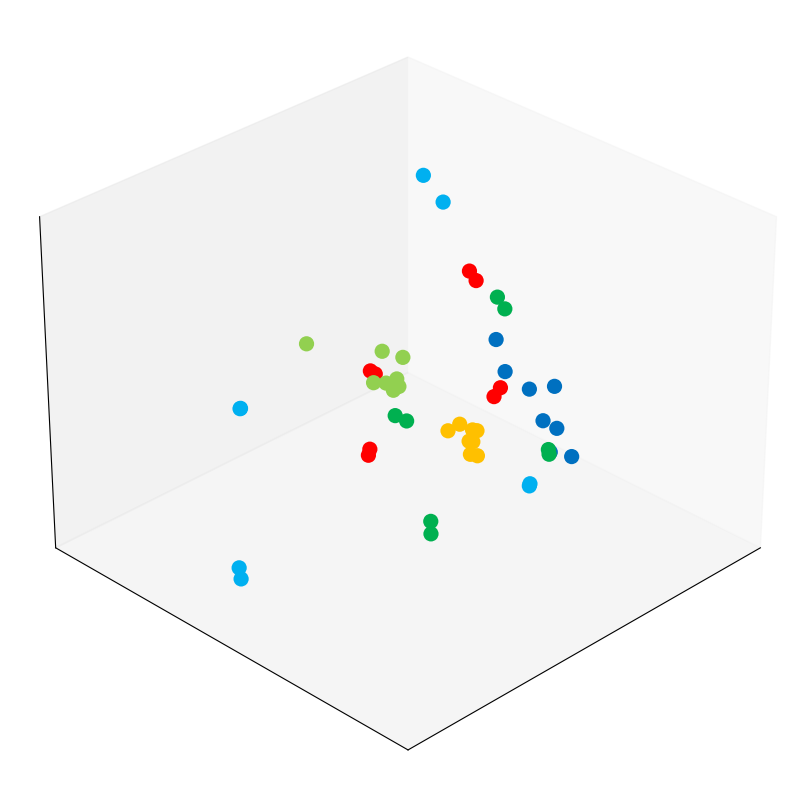

In [323]:
n_per_label = 8
clrs = []
legend_labels = []
for i in range(6):  # Adjusted to 11 to match your labels list length
    if i < len(stimulus_colors):
        clrs.extend([stimulus_colors[i]] * n_per_label)
        legend_labels.extend([labels[i]] * n_per_label)
clrs = np.array(clrs)
legend_labels = np.array(legend_labels)

# Create Matplotlib Figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each group
for i, label in enumerate(labels):
    mask = (legend_labels == label)
    if np.any(mask):
        # Matplotlib scatter
        ax.scatter(
            reshaped_decoding_result[mask, 0],
            reshaped_decoding_result[mask, 1],
            reshaped_decoding_result[mask, 2],
            color=stimulus_colors[i],
            s=120,  # Size (Matplotlib uses points^2, so 100 is roughly similar to Plotly 10)
            label=label,
            alpha=1.0,
            edgecolors='none' # Removes outlines for cleaner look
        )

# Remove axes details to match your "clean" Plotly look
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Turn off the gray background panes
#ax.xaxis.pane.fill = False
#ax.yaxis.pane.fill = False
#ax.zaxis.pane.fill = False

# Remove the axis lines (spines)
#ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
#ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
#ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Viewpoint (optional: adjust elevation and azimuth to match your preference)
ax.view_init(elev=30, azim=45)

# Save as true Vector PDF
plt.savefig(f'../pdfs/{PREFIX}_decoding.pdf', format='pdf', bbox_inches='tight', dpi=300)

## Plot Trajectories and Crossings

In [325]:
def plot_trajectories_3d(trajectories):
    """
    Plot 3D trajectories with green start points and stimulus-colored end points.
    
    Args:
        trajectories: numpy array of shape (n_trajectories, trajectory_len, 3)
                     Expected: 88 trajectories (11 stimuli × 8 directions)
    """
    fig = go.Figure()
    
    # Define 11 distinct colors for stimuli
    stimulus_colors = [
        '#0070C0', '#00B0F0', '#00B050', '#92D050', '#FF0000', '#FFC000', 
        '#00B0F0', '#00B050', '#92D050', '#FF0000', '#FFC000'
    ]

    stimuli_names = [
        'grat_W12', 'grat_W1', 'grat_W2',
        'neg1dotflow_D1_bg', 'neg3dotflow_D1_bg', 'neg1dotflow_D2_bg', 'neg3dotflow_D2_bg',
        'pos1dotflow_D1_bg', 'pos3dotflow_D1_bg', 'pos1dotflow_D2_bg', 'pos3dotflow_D2_bg'
    ]
    
    # Plot each trajectory
    for i, traj in enumerate(trajectories):
        x, y, z = traj[:, 0], traj[:, 1], traj[:, 2]*0.5
        
        # Determine stimulus index and direction (changes every 8 trajectories)
        stimulus_idx = i // 8
        direction_idx = i % 8
        stimulus_color = stimulus_colors[stimulus_idx % 11]
        stimulus_name = stimuli_names[stimulus_idx % 11]
        
        # Create hover text for trajectory points
        hover_text = [f"Stimulus: {stimulus_name}<br>Direction: {direction_idx+1}<br>Step: {j+1}<br>X: {x[j]:.3f}<br>Y: {y[j]:.3f}<br>Z: {z[j]:.3f}" 
                     for j in range(len(x))]
        
        fig.add_trace(go.Scatter3d(
            x=x, y=y, z=z,
            mode='lines',
            name=stimulus_name,
            line=dict(width=5, color=stimulus_color),
            opacity=0.3,  # Reduced opacity
            showlegend=False,  # Disabled legend
            legendgroup=f'stimulus_{stimulus_idx}',
            hoverinfo='text',
            hovertext=hover_text
        ))
        
        # Start point (black)
        fig.add_trace(go.Scatter3d(
            x=[x[0]], y=[y[0]], z=[z[0]],
            mode='markers',
            marker=dict(color='black', size=5),
            #opacity=0.3,  # Reduced opacity
            name='Start Points' if i == 0 else '',
            showlegend=False,  # Disabled legend
            legendgroup='start',
            hoverinfo='text',
            hovertext=f"START<br>Stimulus: {stimulus_name}<br>Direction: {direction_idx+1}"
        ))
        
        # End point (colored by stimulus)
        fig.add_trace(go.Scatter3d(
            x=[x[-1]], y=[y[-1]], z=[z[-1]],
            mode='markers',
            marker=dict(color=stimulus_color, size=10),
            #opacity=0.3,  # Reduced opacity
            name=f'{stimulus_name} (End)' if i % 8 == 0 else '',
            showlegend=False,  # Disabled legend
            legendgroup=f'stimulus_end_{stimulus_idx}',
            hoverinfo='text',
            hovertext=f"END<br>Stimulus: {stimulus_name}<br>Direction: {direction_idx+1}"
        ))

    """for i in range(len(crossing_coords)):
        x, y, z = crossing_coords[i, 0], crossing_coords[i, 1], crossing_coords[i, 2]

        # Start point (green)
        fig.add_trace(go.Scatter3d(
            x=[x], y=[y], z=[z],
            mode='markers',
            marker=dict(color='red', size=4, symbol="x"),
            name='Cross' if i == 0 else '',
            showlegend=(i == 0),
            legendgroup='cross'
        ))"""
    
    fig.update_layout(
        margin=dict(l=0, r=0, b=0, t=0),
        showlegend=False, 
        template="plotly_white",
        scene=dict(
            xaxis=dict(
                showline=True,
                linewidth=2,
                linecolor='black',
                mirror=True,
                showticklabels=False,
                ticks='',
                title=''
            ),
            yaxis=dict(
                showline=True,
                linewidth=2,
                linecolor='black',
                mirror=True,
                showticklabels=False,
                ticks='',
                title=''
            ),
            zaxis=dict(
                showline=True,
                linewidth=2,
                linecolor='black',
                mirror=True,
                showticklabels=False,
                ticks='',
                title=''
            )
        )
    )
    fig.write_html(f'../fig_paper/crossings_{PREFIX}_{filename}.html')
    fig.show()

# Example usage:
# Assuming you have your trajectories array
#plot_trajectories_3d(trajectories)

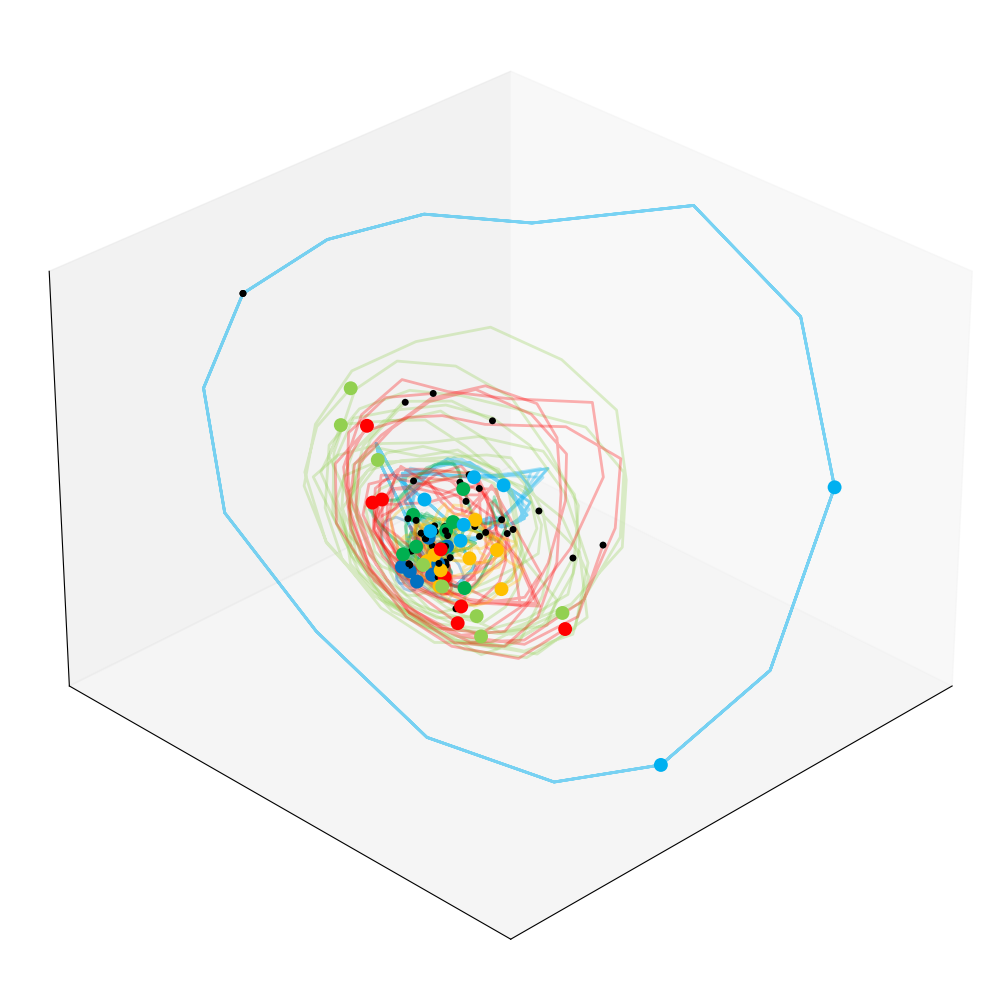

Saved to ../pdfs/crossings_fnn07_act_i3_n2000_SCL0_7_TL37_inputs0_maxFr_maxNr_seed1_sf.pdf


In [326]:
def plot_trajectories_matplotlib(trajectories, prefix="prefix", filename="filename"):
    """
    Plot 3D trajectories using Matplotlib (Vector/PDF safe).
    """
    # 1. Setup Colors and Names (Same as original)
    stimulus_colors = [
        '#0070C0', '#00B0F0', '#00B050', '#92D050', '#FF0000', '#FFC000', 
        '#00B0F0', '#00B050', '#92D050', '#FF0000', '#FFC000'
    ]

    # 2. Initialize Figure
    fig = plt.figure(figsize=(12, 10)) # High res figure size
    ax = fig.add_subplot(111, projection='3d')
    
    # 3. Plot Loop
    for i, traj in enumerate(trajectories):
        # Apply the same z-scaling as your Plotly code
        x, y, z = traj[:, 0], traj[:, 1], traj[:, 2] * 0.5
        
        # Determine grouping
        stimulus_idx = i // 8
        stimulus_color = stimulus_colors[stimulus_idx % 11]
        
        # A. Plot the Trajectory Line
        ax.plot(
            x, y, z, 
            color=stimulus_color, 
            linewidth=2,      # Approx equivalent to Plotly width=5
            alpha=0.3         # Opacity
        )
        
        # B. Start Point (Black)
        ax.scatter(
            x[0], y[0], z[0], 
            color='black', 
            s=25,             # Size (points^2). 25 is approx size 5 in Plotly
            depthshade=False, # Keep color solid black regardless of depth
            edgecolors='none'
        )
        
        # C. End Point (Stimulus Colored)
        ax.scatter(
            x[-1], y[-1], z[-1], 
            color=stimulus_color, 
            s=100,            # Size (points^2). 100 is approx size 10 in Plotly
            depthshade=False,
            edgecolors='none'
        )

    # 4. Styling (Mimicking "plotly_white" and your specific axis settings)
    
    # Remove the gray background panes
    #ax.xaxis.pane.fill = False
    #ax.yaxis.pane.fill = False
    #ax.zaxis.pane.fill = False
    
    # Remove grids
    ax.grid(False)
    
    # Remove tick labels (but keep axis lines visible)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    # Make the axis lines (spines) thicker and black
    # Note: Matplotlib 3D axis styling is tricky; we style the pane edges
    # or set the axis line color to transparency if you strictly want NO lines.
    # However, based on your request for "linewidth=2, linecolor='black'", 
    # we retain the structure:
    ax.xaxis.line.set_color('black')
    ax.yaxis.line.set_color('black')
    ax.zaxis.line.set_color('black')
    
    # Set Initial View (Adjust as needed to match your preferred angle)
    ax.view_init(elev=30, azim=45)
    
    # Optional: Auto-scale aspect ratio to be cubic (like Plotly often does)
    # ax.set_box_aspect([1,1,1]) 

    # 5. Save
    output_path = f'../pdfs/crossings_{prefix}_{filename}.pdf'
    plt.savefig(output_path, format='pdf', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close(fig) # Close to free memory
    print(f"Saved to {output_path}")

# Usage:
plot_trajectories_matplotlib(trajectories, prefix=PREFIX, filename=filename)